In [58]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
from datetime import datetime
from dateutil.parser import parse
import seaborn as sns

In [59]:
#Function to read in an entire directory of .csv files into a DataFrame

def read_csv_dir(dir_path, index_col = None):
    """ read_csv_dir creates a single dataframe out of all the files in a given directory
    dir_path and returns the dataframe
    input: dir_path (string)
    return: df (dataframe)"""
    
    #create a list of all file names in directory
    filelist = os.listdir(dir_path)
    
    #create an empty df and list
    df = pd.DataFrame()
    lst = []

    #loop through loop of lists and create a df for each file
    for file in filelist:
        temp_df = pd.read_csv(dir_path + '/' + file, header=0, index_col = index_col)
        #append each df to the list we created above
        lst.append(temp_df)

    #Concatenate pandas objects along a particular axis(default = 0)
    df = pd.concat(lst)
    #return dataframe
    return df

#test function
gv_df = read_csv_dir('GV_death')

print(gv_df.head())
print(gv_df.info())


      Incident Date          State            City Or County  \
0  November 1, 2014        Georgia                    Resaca   
1  November 1, 2014  Massachusetts                    Boston   
2  November 1, 2014     Washington  Spokane (Spokane Valley)   
3  November 1, 2014      Louisiana               New Orleans   
4  November 1, 2014       Missouri           Callaway County   

                           Address  # Killed  # Injured  Operations  
0                   1201 Midway Rd         1          0         NaN  
1                 18 Lattimore Ct.         1          0         NaN  
2         11910 E. Broadway Avenue         2          0         NaN  
3  1000 block of N. Johnson Street         1          0         NaN  
4       Route D and Old Highway 40         1          0         NaN  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 52338 entries, 0 to 444
Data columns (total 7 columns):
Incident Date     52338 non-null object
State             52338 non-null object
City Or C

In [60]:
# Read in all data
gv_df = read_csv_dir('GV_death')
gv_acc = read_csv_dir('GV_accident')
gv_sui = read_csv_dir('GV_suicide')
gv_mur_sui = read_csv_dir('GV_murd_suic')
gv_dv = read_csv_dir('GV_dv')
gv_mass = read_csv_dir('GV_mass')
gv_off_kill = read_csv_dir('GV_off_kills')
gv_unlaw = read_csv_dir('GV_unlaw')
gv_child_child = pd.read_csv('GV_death_child_child_2014_pres.csv', header=0)
gv_child_other = pd.read_csv('GV_death_child_other_2014_pres.csv', header=0)
gv_child_self = pd.read_csv('GV_death_child_self_2014_pres.csv', header=0)
gv_off_killed = pd.read_csv('GV_off_killed.csv', header=0)
gv_stolen = pd.read_csv('GV_death_stolen.csv', header=0)
gv_offk_unarm = pd.read_csv('GV_off_kills_unarm.csv', header=0)
gv_sch_elhs = pd.read_csv('GV_school_elemhs.csv', header=0)
gv_sch_coll = pd.read_csv('GV_school_coll.csv', header=0)
bkgrnd_df = pd.read_csv('nics-firearm-background-checks.csv', header=0, index_col=None)
print(gv_child_child.info())
print(gv_child_other.info())
print(gv_child_self.info())
print(gv_child_self.head())
print(bkgrnd_df.head())
bkgrnd_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
Incident Date     84 non-null object
State             84 non-null object
City Or County    84 non-null object
Address           76 non-null object
# Killed          84 non-null int64
# Injured         84 non-null int64
Operations        0 non-null float64
dtypes: float64(1), int64(2), object(4)
memory usage: 4.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 7 columns):
Incident Date     273 non-null object
State             273 non-null object
City Or County    273 non-null object
Address           264 non-null object
# Killed          273 non-null int64
# Injured         273 non-null int64
Operations        0 non-null float64
dtypes: float64(1), int64(2), object(4)
memory usage: 15.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 7 columns):
Incident Date     166 non-null obje

In [61]:
# remove unused columns
gv_df = gv_df.iloc[:,:6]
gv_acc = gv_acc.iloc[:,:6]
gv_mur_sui = gv_mur_sui.iloc[:,:6]
gv_sui = gv_sui.iloc[:,:6]
gv_dv = gv_dv.iloc[:,:6]
gv_mass = gv_mass.iloc[:,:6]
gv_off_kill = gv_off_kill.iloc[:,:6]
gv_unlaw = gv_unlaw.iloc[:,:6]
gv_child_child = gv_child_child.iloc[:,:6]
gv_child_other = gv_child_other.iloc[:,:6]
gv_child_self = gv_child_self.iloc[:,:6]
gv_off_killed = gv_off_killed.iloc[:,:6]
gv_stolen = gv_stolen.iloc[:,:6]
gv_offk_unarm = gv_offk_unarm.iloc[:,:6]
gv_sch_elhs = gv_sch_elhs.iloc[:,:6]
gv_sch_coll = gv_sch_coll.iloc[:,:6]

# check a couple
print(gv_df.info())
print(gv_df.head())
print(gv_mur_sui.info())
print(gv_mur_sui.head())
print(gv_off_killed.info())
print(gv_off_killed.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52338 entries, 0 to 444
Data columns (total 6 columns):
Incident Date     52338 non-null object
State             52338 non-null object
City Or County    52338 non-null object
Address           50401 non-null object
# Killed          52338 non-null int64
# Injured         52338 non-null int64
dtypes: int64(2), object(4)
memory usage: 2.8+ MB
None
      Incident Date          State            City Or County  \
0  November 1, 2014        Georgia                    Resaca   
1  November 1, 2014  Massachusetts                    Boston   
2  November 1, 2014     Washington  Spokane (Spokane Valley)   
3  November 1, 2014      Louisiana               New Orleans   
4  November 1, 2014       Missouri           Callaway County   

                           Address  # Killed  # Injured  
0                   1201 Midway Rd         1          0  
1                 18 Lattimore Ct.         1          0  
2         11910 E. Broadway Avenue        

In [62]:
# convert date strings to date.time objects
conv_format = ("%B %d, %Y",)

gv_df['Incident Date'] = gv_df['Incident Date'].apply(datetime.strptime, args=conv_format)
gv_acc['Incident Date'] = gv_acc['Incident Date'].apply(datetime.strptime, args=conv_format)
gv_mur_sui['Incident Date'] = gv_mur_sui['Incident Date'].apply(datetime.strptime, args=conv_format)
gv_sui['Incident Date'] = gv_sui['Incident Date'].apply(datetime.strptime, args=conv_format)
gv_dv['Incident Date'] = gv_dv['Incident Date'].apply(datetime.strptime, args=conv_format)
gv_mass['Incident Date'] = gv_mass['Incident Date'].apply(datetime.strptime, args=conv_format)
gv_off_kill['Incident Date'] = gv_off_kill['Incident Date'].apply(datetime.strptime, args=conv_format)
gv_unlaw['Incident Date'] = gv_unlaw['Incident Date'].apply(datetime.strptime, args=conv_format)
gv_child_child['Incident Date'] = gv_child_child['Incident Date'].apply(datetime.strptime, args=conv_format)
gv_child_other['Incident Date'] = gv_child_other['Incident Date'].apply(datetime.strptime, args=conv_format)
gv_child_self['Incident Date'] = gv_child_self['Incident Date'].apply(datetime.strptime, args=conv_format)
gv_off_killed['Incident Date'] = gv_off_killed['Incident Date'].apply(datetime.strptime, args=conv_format)
gv_stolen['Incident Date'] = gv_stolen['Incident Date'].apply(datetime.strptime, args=conv_format)
gv_offk_unarm['Incident Date'] = gv_offk_unarm['Incident Date'].apply(datetime.strptime, args=conv_format)
gv_sch_elhs['Incident Date'] = gv_sch_elhs['Incident Date'].apply(datetime.strptime, args=conv_format)
gv_sch_coll['Incident Date'] = gv_sch_coll['Incident Date'].apply(datetime.strptime, args=conv_format)

# look at converted dataframe
gv_off_killed.info()
#print(gv_off_killed.head())
#convert month in bkgrnd_df
bkgrnd_df['month'] = bkgrnd_df['month'].apply(parse)
bkgrnd_df.info()
#bkgrnd_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 6 columns):
Incident Date     242 non-null datetime64[ns]
State             242 non-null object
City Or County    242 non-null object
Address           232 non-null object
# Killed          242 non-null int64
# Injured         242 non-null int64
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 11.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12760 entries, 0 to 12759
Data columns (total 27 columns):
month                        12760 non-null datetime64[ns]
state                        12760 non-null object
permit                       12736 non-null float64
permit_recheck               1375 non-null float64
handgun                      12740 non-null float64
long_gun                     12741 non-null float64
other                        5775 non-null float64
multiple                     12760 non-null int64
admin                        12737 non-null float64
prepawn_handg

In [63]:
# Add columns to indicate type of death
gv_acc['accident'] = True
gv_mur_sui['murder_suicide'] = True
gv_sui['suicide'] = True
gv_dv['dom_violence'] = True
gv_mass['mass_kill'] = True
gv_off_kill['police_kill_susp'] = True
gv_unlaw['unlawful_weap'] = True
gv_child_child['child_kill_child'] = True
gv_child_self['child_kill_self'] = True
gv_off_killed['police_death'] = True
gv_stolen['stolen_weap'] = True
gv_offk_unarm['police_kill_unarm'] = True
gv_sch_elhs['school_k_to_12'] = True
gv_sch_coll['school_college'] = True
print(gv_child_child.head())
gv_acc.head()

  Incident Date      State City Or County                           Address  \
0    2018-03-10  Wisconsin      Milwaukee           4500 block of N 38th St   
1    2018-03-02   Colorado        Arboles                               NaN   
2    2017-12-22   Maryland        Aquasco  15500 block of Saint Phillips Rd   
3    2017-12-06   Michigan        Detroit           11000 block of Rossiter   
4    2017-11-10  Tennessee        Memphis              3527 S Mendenhall Rd   

   # Killed  # Injured  child_kill_child  
0         1          0              True  
1         1          0              True  
2         1          0              True  
3         1          0              True  
4         1          0              True  


,Incident Date,State,City Or County,Address,# Killed,# Injured,accident
0,2014-12-31,Alabama,Montgomery,1700 block of Yarborough Street,1,0,True
1,2014-12-30,Tennessee,Anderson County,2688 Dutch Valley Road,1,0,True
2,2014-12-30,Virginia,Richmond,5800 block of Orcutt Lane,1,0,True
3,2014-12-30,Idaho,Hayden,550 W Honeysuckle Ave,1,0,True
4,2014-12-30,Florida,West Palm Beach,2300 Caroma Lane,1,0,True


In [64]:
# merge child deaths into a single dataframe
#print(gv_child_other.info())
#print(gv_child_self.info())
# merge gv_child_other, gv_child_self
gv_child = pd.merge(gv_child_other, gv_child_self, how = 'outer',
                    on =['Incident Date', 'State', 'City Or County',
                         'Address', '# Killed','# Injured'])
#print(gv_child.info())
#gv_child.head()
#print(gv_child_child.info())

gv_child = pd.merge(gv_child, gv_child_child, how = 'outer',
                    on =['Incident Date', 'State', 'City Or County',
                         'Address', '# Killed','# Injured'])
gv_child['child_killed'] = True
print(gv_child.info())
gv_child.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516 entries, 0 to 515
Data columns (total 9 columns):
Incident Date       516 non-null datetime64[ns]
State               516 non-null object
City Or County      516 non-null object
Address             490 non-null object
# Killed            516 non-null int64
# Injured           516 non-null int64
child_kill_self     166 non-null object
child_kill_child    84 non-null object
child_killed        516 non-null bool
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 36.8+ KB
None


,Incident Date,State,City Or County,Address,# Killed,# Injured,child_kill_self,child_kill_child,child_killed
0,2018-03-12,Louisiana,Lake Providence,NaN,1,0,NaN,NaN,True
1,2018-03-12,Missouri,Cape Girardeau,NaN,1,0,NaN,NaN,True
2,2018-03-10,Florida,Ocala,FR 88,3,0,NaN,NaN,True
3,2018-03-07,Alabama,Huntsville,Murray Road,1,0,NaN,NaN,True
4,2018-03-01,North Carolina,Laurinburg,3rd St,1,0,NaN,NaN,True


In [65]:
# remove double counts from child_kill_child
double_cnt = (gv_child['child_kill_self'] == True) & (gv_child['child_kill_child'] == True)
gv_child.loc[double_cnt]
gv_child.loc[(gv_child['child_kill_self'] == True), 'child_kill_child'] = False
gv_child.loc[double_cnt]

,Incident Date,State,City Or County,Address,# Killed,# Injured,child_kill_self,child_kill_child,child_killed
280,2017-12-06,Michigan,Detroit,11000 block of Rossiter,1,0,True,False,True
286,2017-10-03,Florida,Orlando,222 Neighborhood Market Rd,1,0,True,False,True
289,2017-09-28,Ohio,Cleveland (Parma),6600 block of Brownfield Dr,1,0,True,False,True
325,2017-01-20,Florida,Auburndale,100 block of Lakeside Hills Loop,1,0,True,False,True
342,2016-08-06,Idaho,Weiser,Macomb Road,1,0,True,False,True
353,2016-06-23,Pennsylvania,Philadelphia,1800 block of N 20th Street,1,0,True,False,True
367,2016-02-16,New Hampshire,Durham,NaN,1,0,True,False,True


In [66]:
# merge suicide and murder suicide datasets
print(gv_sui.info())
print(gv_mur_sui.info())

gv_sui_all = pd.merge(gv_sui, gv_mur_sui, how = 'outer',
                      on =['Incident Date', 'State', 'City Or County',
                           'Address', '# Killed','# Injured'])
print(gv_sui_all.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5244 entries, 0 to 262
Data columns (total 7 columns):
Incident Date     5244 non-null datetime64[ns]
State             5244 non-null object
City Or County    5244 non-null object
Address           4867 non-null object
# Killed          5244 non-null int64
# Injured         5244 non-null int64
suicide           5244 non-null bool
dtypes: bool(1), datetime64[ns](1), int64(2), object(3)
memory usage: 291.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2433 entries, 0 to 126
Data columns (total 7 columns):
Incident Date     2433 non-null datetime64[ns]
State             2433 non-null object
City Or County    2433 non-null object
Address           2339 non-null object
# Killed          2433 non-null int64
# Injured         2433 non-null int64
murder_suicide    2433 non-null bool
dtypes: bool(1), datetime64[ns](1), int64(2), object(3)
memory usage: 135.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5391 entries, 0 

In [67]:
# clean up discrepancy data.
mis_id = (gv_sui_all['suicide'].isnull()) & (gv_sui_all['murder_suicide'] == True)
gv_sui_all = gv_sui_all[~mis_id]
gv_sui_all[(gv_sui_all['suicide'].isnull()) & (gv_sui_all['murder_suicide'] == True)]

,Incident Date,State,City Or County,Address,# Killed,# Injured,suicide,murder_suicide


In [68]:
# merge the rest of the data

gv_df = pd.merge(gv_df, gv_acc, how = 'left',
                      on =['Incident Date', 'State', 'City Or County',
                           'Address', '# Killed','# Injured'])
gv_df = pd.merge(gv_df, gv_sui_all, how = 'left',
                      on =['Incident Date', 'State', 'City Or County',
                           'Address', '# Killed','# Injured'])
gv_df = pd.merge(gv_df, gv_dv, how = 'left',
                      on =['Incident Date', 'State', 'City Or County',
                           'Address', '# Killed','# Injured'])
gv_df = pd.merge(gv_df, gv_mass, how = 'left',
                      on =['Incident Date', 'State', 'City Or County',
                           'Address', '# Killed','# Injured'])
gv_df = pd.merge(gv_df, gv_off_kill, how = 'left',
                      on =['Incident Date', 'State', 'City Or County',
                           'Address', '# Killed','# Injured'])
gv_df = pd.merge(gv_df, gv_unlaw, how = 'left',
                      on =['Incident Date', 'State', 'City Or County',
                           'Address', '# Killed','# Injured'])
gv_df = pd.merge(gv_df, gv_child, how = 'left',
                      on =['Incident Date', 'State', 'City Or County',
                           'Address', '# Killed','# Injured'])
gv_df = pd.merge(gv_df, gv_off_killed, how = 'left',
                      on =['Incident Date', 'State', 'City Or County',
                           'Address', '# Killed','# Injured'])
gv_df = pd.merge(gv_df, gv_stolen, how = 'left',
                      on =['Incident Date', 'State', 'City Or County',
                           'Address', '# Killed','# Injured'])
gv_df = pd.merge(gv_df, gv_offk_unarm, how = 'left',
                      on =['Incident Date', 'State', 'City Or County',
                           'Address', '# Killed','# Injured'])
gv_df = pd.merge(gv_df, gv_sch_elhs, how = 'left',
                      on =['Incident Date', 'State', 'City Or County',
                           'Address', '# Killed','# Injured'])
gv_df2 = pd.merge(gv_df, gv_sch_coll, how = 'left',
                      on =['Incident Date', 'State', 'City Or County',
                           'Address', '# Killed','# Injured'])

gv_df2.head()

,Incident Date,State,City Or County,Address,# Killed,# Injured,accident,suicide,murder_suicide,dom_violence,...,police_kill_susp,unlawful_weap,child_kill_self,child_kill_child,child_killed,police_death,stolen_weap,police_kill_unarm,school_k_to_12,school_college
0,2014-11-01,Georgia,Resaca,1201 Midway Rd,1,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-11-01,Massachusetts,Boston,18 Lattimore Ct.,1,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-11-01,Washington,Spokane (Spokane Valley),11910 E. Broadway Avenue,2,0,NaN,NaN,NaN,NaN,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-11-01,Louisiana,New Orleans,1000 block of N. Johnson Street,1,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-11-01,Missouri,Callaway County,Route D and Old Highway 40,1,0,NaN,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
# fill in Nan with False in new columns
gv_df2.iloc[:,6:21] = gv_df2.iloc[:,6:21].fillna(value=False)
gv_df2.head()

,Incident Date,State,City Or County,Address,# Killed,# Injured,accident,suicide,murder_suicide,dom_violence,...,police_kill_susp,unlawful_weap,child_kill_self,child_kill_child,child_killed,police_death,stolen_weap,police_kill_unarm,school_k_to_12,school_college
0,2014-11-01,Georgia,Resaca,1201 Midway Rd,1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2014-11-01,Massachusetts,Boston,18 Lattimore Ct.,1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2014-11-01,Washington,Spokane (Spokane Valley),11910 E. Broadway Avenue,2,0,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,2014-11-01,Louisiana,New Orleans,1000 block of N. Johnson Street,1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2014-11-01,Missouri,Callaway County,Route D and Old Highway 40,1,0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [70]:
# sort by incident date, relabel columns and index incident_date
gv_sorted = gv_df2.sort_values('Incident Date')
col_list = list(gv_sorted.columns)
col_list[0:6] = ['incident_date', 'state', 'city_county', 'address', 'killed', 'injured']
gv_sorted.columns = col_list
gv_indexed = gv_sorted.set_index('incident_date')
# take only 2014-2017 data
gv_indexed = gv_indexed.loc['2014':'2017']
gv_indexed.tail()

,state,city_county,address,killed,injured,accident,suicide,murder_suicide,dom_violence,mass_kill,police_kill_susp,unlawful_weap,child_kill_self,child_kill_child,child_killed,police_death,stolen_weap,police_kill_unarm,school_k_to_12,school_college
incident_date,,,,,,,,,,,,,,,,,,,,
2017-12-31,California,West Sacramento,1050 W Capitol Ave,3,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2017-12-31,South Carolina,Columbia,Coley Rd,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2017-12-31,South Carolina,Greenville,115 Rasor Dr,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2017-12-31,Wisconsin,Milwaukee,40th and Sheridan,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2017-12-31,Virginia,Norfolk,300 block of Virginian Dr,1,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [71]:
# groupby year, state and sum killed and injured totals per month/state
gv_grouped = gv_indexed.groupby([pd.Grouper(freq='A'), 'state'])
gv_grouped_total = gv_grouped[['killed', 'injured']]
gv_ann_total = gv_grouped_total.agg('sum')
gv_ann_total.columns = ["total_killed", "total_injured"]
gv_ann_state = gv_ann_total.reset_index()
print(gv_ann_state.head())

# create killed and injured columns for all categories
col_list = list(gv_indexed.columns)

# generate totals for categories and merge with total df
for col in col_list[5:]:
    gv_filter = gv_indexed[gv_indexed[col] == True]
    gv_filt_group = gv_filter.groupby([pd.Grouper(freq='A'), 'state'])
    #gv_filt_total = gv_filt_group[['killed', 'injured']].agg('sum')
    gv_filt_total = pd.DataFrame(gv_filt_group['killed'].agg('sum'))
    #gv_filt_total.columns = [col + '_' + 'killed', col + '_' + 'injured']
    gv_filt_total.rename(columns={'killed':col}, inplace=True)
    gv_filt_total = gv_filt_total.reset_index()
    gv_ann_state = pd.merge(gv_ann_state, gv_filt_total, how = 'left',
                           on =['incident_date', 'state']).fillna(value=0)

# create suicide_incidents column
gv_filter = gv_indexed[gv_indexed['suicide'] == True]
gv_filt_group = gv_filter.groupby([pd.Grouper(freq='A'), 'state'])
gv_filt_total = gv_filt_group['killed'].agg('count')
gv_filt_total = gv_filt_total.reset_index()
gv_filt_total.columns = ['incident_date', 'state', 'suicide_incidents']
gv_ann_state = pd.merge(gv_ann_state, gv_filt_total, how = 'left',
                       on =['incident_date', 'state']).fillna(value=0)


#cast new columns to ints
col_list = list(gv_ann_state.columns)
for col in col_list[4:]:
    gv_ann_state[col]  = gv_ann_state[col].astype(int)   

    
# change incident_date column to year.
gv_ann_state.rename(columns={'incident_date':'year'}, inplace=True)

gv_ann_state.tail()


#gv_filter_acc = gv_indexed[gv_indexed['accident'] == True]
#gv_filter_acc.head()

  incident_date       state  total_killed  total_injured
0    2014-12-31     Alabama           311             41
1    2014-12-31      Alaska            28              2
2    2014-12-31     Arizona           218             39
3    2014-12-31    Arkansas           167             40
4    2014-12-31  California          1306            316


,year,state,total_killed,total_injured,accident,suicide,murder_suicide,dom_violence,mass_kill,police_kill_susp,unlawful_weap,child_kill_self,child_kill_child,child_killed,police_death,stolen_weap,police_kill_unarm,school_k_to_12,school_college,suicide_incidents
199,2017-12-31,Virginia,385,98,10,55,35,62,7,30,25,3,0,6,1,0,0,1,0,35
200,2017-12-31,Washington,233,32,8,52,27,44,5,44,9,0,0,2,0,1,1,1,0,36
201,2017-12-31,West Virginia,83,8,2,16,8,21,0,11,3,0,0,2,0,2,0,0,0,11
202,2017-12-31,Wisconsin,207,31,9,36,22,32,5,30,12,1,0,4,5,0,0,0,0,23
203,2017-12-31,Wyoming,9,1,0,3,2,3,0,1,0,0,0,0,0,0,0,0,0,2


In [72]:
# group by month for entire country for trendline analysis
# groupby year, state and sum killed and injured totals per month/state
gv_group_month = gv_indexed.groupby(pd.Grouper(freq='M'))
gv_group_m_total = gv_group_month[['killed', 'injured']]
gv_month_total = gv_group_m_total.agg('sum')
gv_month_total.columns = ["total_killed", "total_injured"]
gv_month = gv_month_total.reset_index()
print(gv_month.head())

# create killed and injured columns for all categories
col_list = list(gv_indexed.columns)

# generate totals for categories and merge with total df
for col in col_list[5:]:
    gv_filter = gv_indexed[gv_indexed[col] == True]
    gv_filt_group = gv_filter.groupby(pd.Grouper(freq='M'))
    gv_filt_total = gv_filt_group[['killed', 'injured']].agg('sum')
    #gv_filt_total = pd.DataFrame(gv_filt_group['killed'].agg('sum'))
    gv_filt_total.columns = [col + '_' + 'killed', col + '_' + 'injured']
    #gv_filt_total.rename(columns={'killed':col}, inplace=True)
    gv_filt_total = gv_filt_total.reset_index()
    #print(gv_filt_total.head())
    gv_month = pd.merge(gv_month, gv_filt_total, how = 'left',
                           on ='incident_date').fillna(value=0)

# create incidents columns
inc_cols = ['suicide', 'police_death', 'police_kill_susp', 'police_kill_unarm']

for col in inc_cols:
    gv_filter = gv_indexed[gv_indexed[col] == True]
    gv_filt_group = gv_filter.groupby(pd.Grouper(freq='M'))
    gv_filt_total = gv_filt_group['killed'].agg('count')
    gv_filt_total = gv_filt_total.reset_index()
    gv_filt_total.rename(columns={'killed':col + "_inc"}, inplace=True)
    #gv_filt_total.columns = ['incident_date', 'suicide_incidents']
    gv_month = pd.merge(gv_month, gv_filt_total, how = 'left',
                        on ='incident_date').fillna(value=0)

# create police_death_incid column
#gv_filter = gv_indexed[gv_indexed['police_death'] == True]
#gv_filt_group = gv_filter.groupby(pd.Grouper(freq='M'))
#gv_filt_total = gv_filt_group['killed'].agg('count')
#gv_filt_total = gv_filt_total.reset_index()
#gv_filt_total.columns = ['incident_date', 'police_death_incid']
#gv_month = pd.merge(gv_month, gv_filt_total, how = 'left',
#                       on ='incident_date').fillna(value=0)

#cast new columns to ints
col_list = list(gv_month.columns)
for col in col_list[4:]:
    gv_month[col]  = gv_month[col].astype(int)   

    
# change incident_date column to year.
gv_month.rename(columns={'incident_date':'month'}, inplace=True)
print(gv_month.info())
gv_month.tail()

  incident_date  total_killed  total_injured
0    2014-01-31           986            169
1    2014-02-28           785            127
2    2014-03-31           962            192
3    2014-04-30           945            196
4    2014-05-31          1053            234
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 37 columns):
month                        48 non-null datetime64[ns]
total_killed                 48 non-null int64
total_injured                48 non-null int64
accident_killed              48 non-null int64
accident_injured             48 non-null int32
suicide_killed               48 non-null int32
suicide_injured              48 non-null int32
murder_suicide_killed        48 non-null int32
murder_suicide_injured       48 non-null int32
dom_violence_killed          48 non-null int32
dom_violence_injured         48 non-null int32
mass_kill_killed             48 non-null int32
mass_kill_injured            48 non-null int32
police_

,month,total_killed,total_injured,accident_killed,accident_injured,suicide_killed,suicide_injured,murder_suicide_killed,murder_suicide_injured,dom_violence_killed,...,police_kill_unarm_killed,police_kill_unarm_injured,school_k_to_12_killed,school_k_to_12_injured,school_college_killed,school_college_injured,suicide_inc,police_death_inc,police_kill_susp_inc,police_kill_unarm_inc
43,2017-08-31,1317,253,35,0,147,13,85,0,150,...,5,0,0,0,0,0,102,3,107,5
44,2017-09-30,1183,259,33,1,149,15,86,1,147,...,4,0,2,3,2,0,103,1,87,4
45,2017-10-31,1354,678,44,1,211,453,96,6,147,...,1,0,0,0,4,1,102,7,97,1
46,2017-11-30,1289,270,31,0,189,43,103,14,167,...,2,0,8,12,1,0,104,4,93,2
47,2017-12-31,1281,210,28,0,170,9,109,4,181,...,5,0,4,0,3,0,105,2,98,5


In [73]:
# look for 10/2017 incidents that caused high death rates
high_death = (gv_indexed.loc['2017-10', 'killed'] > 25)
gv_indexed_red = gv_indexed.loc['2017-10']
gv_indexed_red[high_death]

,state,city_county,address,killed,injured,accident,suicide,murder_suicide,dom_violence,mass_kill,police_kill_susp,unlawful_weap,child_kill_self,child_kill_child,child_killed,police_death,stolen_weap,police_kill_unarm,school_k_to_12,school_college
incident_date,,,,,,,,,,,,,,,,,,,,
2017-10-01,Nevada,Las Vegas,3950 Las Vegas Blvd S,59,441,False,True,False,False,True,True,False,False,False,False,True,False,False,False,False


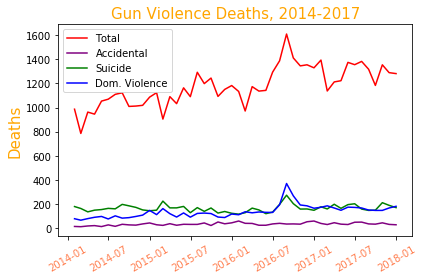

In [74]:
# monthly trendline analysis
plt.plot(gv_month['month'], gv_month['total_killed'], color = "red", label ="Total")
plt.plot(gv_month['month'], gv_month['accident_killed'], color = 'purple', label = "Accidental")
plt.plot(gv_month['month'], gv_month['suicide_killed'], color = 'green', label = "Suicide")
plt.plot(gv_month['month'], gv_month['dom_violence_killed'], color = 'blue', label = "Dom. Violence")



plt.ylabel("Deaths", color = 'orange', size=15)
plt.xticks(rotation=30, color='coral')
plt.legend()
plt.title('Gun Violence Deaths, 2014-2017', color='orange', size = 15)
plt.tight_layout()
plt.savefig('gv_death_total')
plt.show()

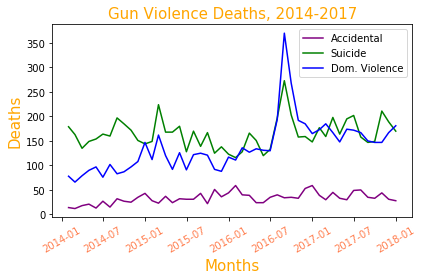

In [75]:
# monthly trendline analysis
plt.plot('month', 'accident_killed', data=gv_month, color = 'purple', label = "Accidental")
plt.plot('month', 'suicide_killed', data=gv_month, color = 'green', label = "Suicide")
plt.plot('month', 'dom_violence_killed', data=gv_month, color = 'blue', label = "Dom. Violence")

plt.xlabel("Months", color='orange', size = 15)
plt.ylabel("Deaths", color = 'orange', size=15)
plt.xticks(rotation=30, color='coral')
plt.legend()
plt.title('Gun Violence Deaths, 2014-2017', color='orange', size = 15)
plt.tight_layout()
plt.savefig('gv_death_other')
plt.show()

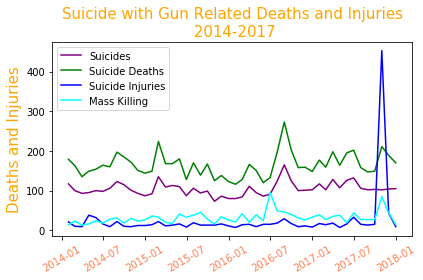

In [76]:
# monthly trendline analysis
plt.plot('month', 'suicide_inc', data=gv_month, color = 'purple', label = "Suicides")
plt.plot('month', 'suicide_killed', data=gv_month, color = 'green', label = "Suicide Deaths")
plt.plot('month', 'suicide_injured', data=gv_month, color = 'blue', label = "Suicide Injuries")
plt.plot('month', 'mass_kill_killed', data=gv_month, color = 'cyan', label = "Mass Killing")


plt.ylabel("Deaths and Injuries", color = 'orange', size=15)
plt.xticks(rotation=30, color='coral')
plt.legend()
plt.title('Suicide with Gun Related Deaths and Injuries\n 2014-2017', color='orange', size = 15)
plt.tight_layout()
plt.savefig('gv_death_suic')
plt.show()

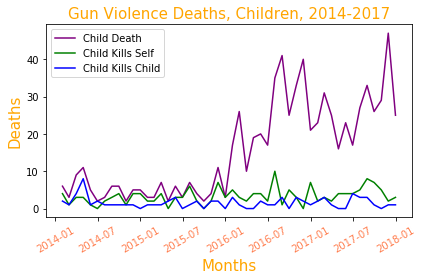

In [77]:
# monthly trendline analysis
plt.plot('month', 'child_killed_killed', data=gv_month, color = 'purple', label = "Child Death")
plt.plot('month', 'child_kill_self_killed', data=gv_month, color = 'green', label = "Child Kills Self")
plt.plot('month', 'child_kill_child_killed', data=gv_month, color = 'blue', label = "Child Kills Child")

plt.xlabel("Months", color='orange', size = 15)
plt.ylabel("Deaths", color = 'orange', size=15)
plt.xticks(rotation=30, color='coral')
plt.legend()
plt.title('Gun Violence Deaths, Children, 2014-2017', color='orange', size = 15)
plt.tight_layout()
plt.savefig('gv_death_child')
plt.show()

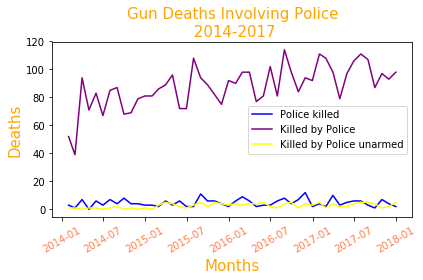

In [78]:
# monthly trendline analysis
plt.plot(gv_month['month'], gv_month['police_death_inc'], color = 'blue', label = "Police killed")
plt.plot(gv_month['month'], gv_month['police_kill_susp_inc'], color = 'purple', label = "Killed by Police")
plt.plot(gv_month['month'], gv_month['police_kill_unarm_inc'], color = 'yellow', label = "Killed by Police unarmed")
#plt.plot(gv_month['month'], gv_month['mass_kill_killed'], color = 'cyan', label = "Mass Killing")


plt.xlabel("Months", color='orange', size = 15)
plt.ylabel("Deaths", color = 'orange', size=15)
plt.xticks(rotation=30, color='coral')
plt.legend()
plt.title('Gun Deaths Involving Police\n 2014-2017', color='orange', size = 15)
plt.tight_layout()
plt.savefig('gv_death_pol')
plt.show()

In [79]:
# Add in background check data for linear regression analysis vs. death rates

# reduce the background check to essential columns
bkgrnd2_df = bkgrnd_df[['month','state', 'handgun', 'long_gun', 'other']]
# set index to month column
bkgrnd_indexed = bkgrnd2_df.set_index('month')
bkgrnd_indexed = bkgrnd_indexed.sort_index()
# take only data for 2014-2017
bckgnd_2014_2017 = bkgrnd_indexed.loc['2014':'2017']
#print(bckgnd_2014_2017.tail())
# group bckgnd and calculate yearly totals
bkgrnd_group = bckgnd_2014_2017.groupby([pd.Grouper(freq='A'), 'state'])
bkgrnd_ann_state = bkgrnd_group[['handgun', 'long_gun']].agg('sum')
bkgrnd_ann_state = bkgrnd_ann_state.reset_index()
bkgrnd_ann_state.rename(columns={'month':'year'}, inplace=True)

#merge bckgrnd and gv dataframes
gv_ann_state = pd.merge(gv_ann_state, bkgrnd_ann_state, how = 'left',
                        on =['year', 'state'])



gv_ann_state

,year,state,total_killed,total_injured,accident,suicide,murder_suicide,dom_violence,mass_kill,police_kill_susp,...,child_kill_child,child_killed,police_death,stolen_weap,police_kill_unarm,school_k_to_12,school_college,suicide_incidents,handgun,long_gun
0,2014-12-31,Alabama,311,41,7,40,28,25,1,12,...,0,2,2,0,0,0,0,23,178355.0,170815.0
1,2014-12-31,Alaska,28,2,2,8,0,5,0,2,...,0,0,2,0,0,0,0,8,35694.0,39625.0
2,2014-12-31,Arizona,218,39,4,44,30,14,1,35,...,1,2,4,0,0,0,0,28,123375.0,91086.0
3,2014-12-31,Arkansas,167,40,3,36,30,18,5,5,...,0,1,0,0,0,0,0,18,60520.0,82670.0
4,2014-12-31,California,1306,316,12,133,90,52,43,169,...,0,2,7,0,6,0,0,84,495962.0,369009.0
5,2014-12-31,Colorado,142,22,3,45,34,9,1,19,...,0,0,0,0,0,0,0,27,182498.0,156062.0
6,2014-12-31,Connecticut,68,10,3,14,8,6,0,1,...,0,0,0,0,0,0,0,10,78637.0,59470.0
7,2014-12-31,Delaware,50,8,0,4,2,0,0,3,...,0,0,0,0,0,0,0,3,19310.0,19271.0
8,2014-12-31,District of Columbia,90,9,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,475.0,30.0
9,2014-12-31,Florida,825,163,17,147,106,81,26,66,...,0,3,7,2,0,0,1,85,469636.0,274733.0


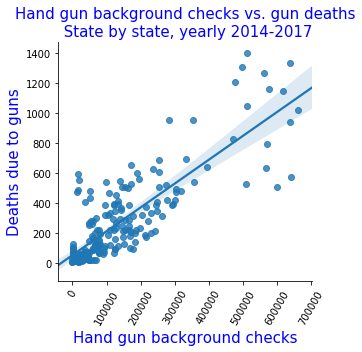

In [83]:
# Plot a linear regression between 'handgun' and 'total_killed'

sns.lmplot(x = 'handgun', y='total_killed', data=gv_ann_state)
plt.xticks(rotation=60)
# Add the title
plt.title('Hand gun background checks vs. gun deaths\n State by state, yearly 2014-2017', size= 15, color='blue')

# Add the x-axis label
plt.xlabel('Hand gun background checks', size= 15, color='blue')

# Add the y-axis label
plt.ylabel('Deaths due to guns', size= 15, color='blue')
plt.tight_layout()
# Display the plot
plt.savefig('death_hgback')
plt.show()


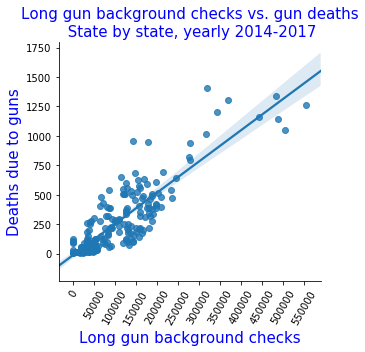

In [84]:
# Plot a linear regression between 'long_gun' and 'total_killed'

sns.lmplot(x = 'long_gun', y='total_killed', data=gv_ann_state)


# Add the title
plt.title('Long gun background checks vs. gun deaths\n State by state, yearly 2014-2017', size= 15, color='blue')

# Add the x-axis label
plt.xlabel('Long gun background checks', size= 15, color='blue')

# Add the y-axis label
plt.ylabel('Deaths due to guns', size= 15, color='blue')
plt.xticks([w*50000 for w in range(12)], rotation=60)
plt.tight_layout()
# Display the plot
plt.savefig('death_lgback')
plt.show()

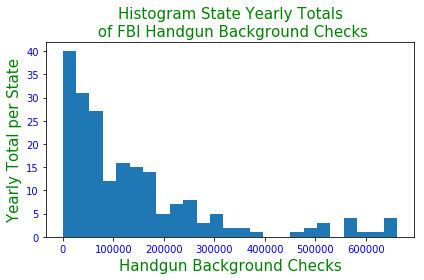

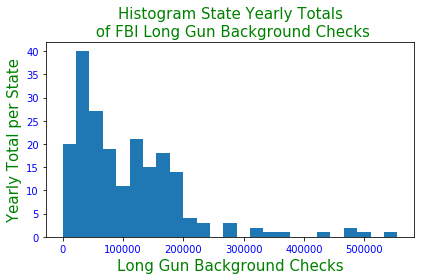

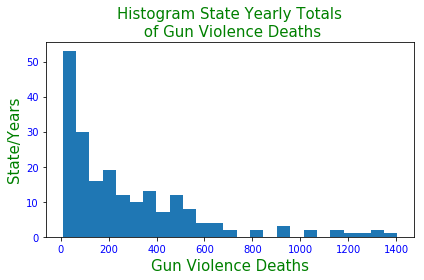

In [109]:

plt.hist(gv_ann_state['handgun'], bins=25)
plt.xticks( color='blue')
plt.yticks(color='blue')
# Add the title
plt.title('Histogram State Yearly Totals\n of FBI Handgun Background Checks', size= 15, color='green')

# Add the x-axis label
plt.xlabel('Handgun Background Checks', size= 15, color='green')

# Add the y-axis label
plt.ylabel('Yearly Total per State', size= 15, color='green')
plt.tight_layout()
# Display the plot
plt.savefig('handgun_hist')
plt.show()

plt.hist(gv_ann_state['long_gun'], bins=25)
plt.xticks( color='blue')
plt.yticks(color='blue')
# Add the title
plt.title('Histogram State Yearly Totals\n of FBI Long Gun Background Checks', size= 15, color='green')

# Add the x-axis label
plt.xlabel('Long Gun Background Checks', size= 15, color='green')

# Add the y-axis label
plt.ylabel('Yearly Total per State', size= 15, color='green')
plt.tight_layout()
# Display the plot
plt.savefig('longgun_hist')
plt.show()

plt.hist(gv_ann_state['total_killed'], bins=25)

plt.xticks( color='blue')
plt.yticks(color='blue')
# Add the title
plt.title('Histogram State Yearly Totals\n of Gun Violence Deaths', size= 15, color='green')

# Add the x-axis label
plt.xlabel('Gun Violence Deaths', size= 15, color='green')

# Add the y-axis label
plt.ylabel('State/Years', size= 15, color='green')
plt.tight_layout()
# Display the plot
plt.savefig('tot_death_hist')
plt.show()

In [88]:
lin_rel_hg = np.corrcoef(gv_ann_state['handgun'], gv_ann_state['total_killed'])
print("correlation for hand guns:" + str(lin_rel_hg))
lin_rel_lg = np.corrcoef(gv_ann_state['long_gun'], gv_ann_state['total_killed'])
print("correlation for long guns:" + str(lin_rel_lg))


correlation for hand guns:[[ 1.          0.83078421]
 [ 0.83078421  1.        ]]
correlation for long guns:[[ 1.          0.86255002]
 [ 0.86255002  1.        ]]


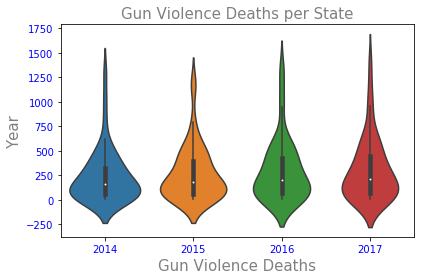

In [108]:
# Generate a violin plot of 'total_killed' grouped horizontally by 'year'

sns.violinplot(x='year', y='total_killed', data=gv_ann_state)

plt.xticks([0,1,2,3], ['2014', '2015', '2016', '2017'], color='blue')

plt.yticks(color='blue')
# Add the title
plt.title('Gun Violence Deaths per State', size= 15, color='grey')

# Add the x-axis label
plt.xlabel('Gun Violence Deaths', size= 15, color='grey')

# Add the y-axis label
plt.ylabel('Year', size= 15, color='grey')
plt.tight_layout()
# Display the plot
plt.savefig('tot_death_viol')

plt.show()

In [ ]:
# Generate a violin plot of 'total_killed' grouped horizontally by 'year'

sns.violinplot(x='year', y='total_killed', data=gv_ann_state)

plt.xticks([0,1,2,3], ['2014', '2015', '2016', '2017'], color='blue')

plt.yticks(color='blue')
# Add the title
plt.title('Gun Violence Deaths per State', size= 15, color='grey')

# Add the x-axis label
plt.xlabel('Gun Violence Deaths', size= 15, color='grey')

# Add the y-axis label
plt.ylabel('Year', size= 15, color='grey')
plt.tight_layout()
# Display the plot
plt.savefig('tot_death_viol')

plt.show()